У цьому домашньому завданні ми будемо працювати з набором даних Tips. Нижче інформація про нього.

**Про датасет:**

Tips - це датасет, який містить інформацію про рахунки та чайові в ресторані.

**Колонки датасету:**
- `total_bill` - загальна сума рахунку (долари)
- `tip` - розмір чайових (долари)
- `sex` - стать відвідувача (Male/Female)
- `smoker` - чи курить (Yes/No)
- `day` - день тижня (Thur/Fri/Sat/Sun)
- `time` - час відвідування (Lunch/Dinner)
- `size` - розмір групи (кількість людей)

**Джерело:** Оригінальні дані зібрані в одному з американських ресторанів у 1990-х роках. Скачати і переглянути набір даних можна тут: https://www.kaggle.com/datasets/sakshisatre/tips-dataset

А також ми вже вивантажили файл з даними і завантажили вам у Матеріали до цього модуля.




**1. Гістограма розподілу рахунків**
Завантажте датасет Tips (Чайові) з файла у матеріалах `tips.csv`.
Створіть гістограму для колонки `total_bill` з 20 bins.
Опціонально можна додати підписи осей ОХ, ОУ, а також назву графіку.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv('tips.csv')

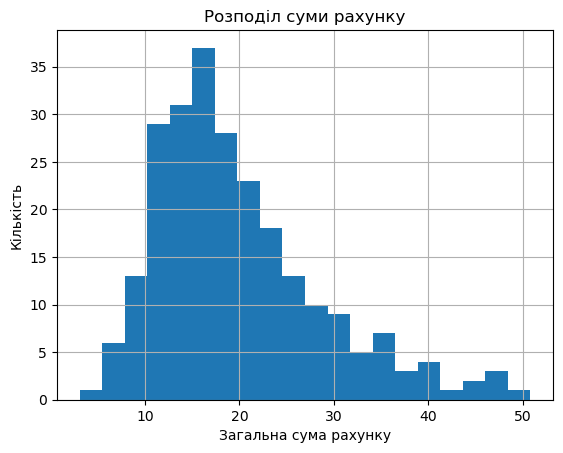

In [57]:
df['total_bill'].hist(bins=20)
plt.title('Розподіл суми рахунку')
plt.xlabel('Загальна сума рахунку')
plt.ylabel('Кількість');

---

**2. Box plot чайових за днями тижня**

Створіть box plot, який показує розподіл чайових (`tip`) за днями тижня (`day`).
В який день навище медіанне (середнє) значення чайоивх? Зелена горизонтальна лінія всередині кожного box-plot.


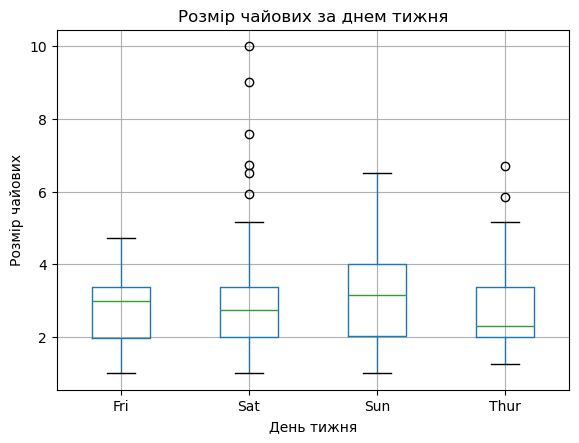

In [58]:
df.boxplot(column='tip', by='day')
plt.title('Розмір чайових за днем тижня')
plt.suptitle('') 
plt.ylabel('Розмір чайових')
plt.xlabel('День тижня');

In [59]:
# По графіку бачимо, що найвищою медіана є або в пʼятницю, або в неділю (важко зрозуміти на око)
# Тому, щоб переконатися напевно, розрахуємо числові значення медіани:
df.groupby('day')['tip'].median()
# З результату бачимо, що в неділю медіана чайових є найвищою

day
Fri     3.000
Sat     2.750
Sun     3.150
Thur    2.305
Name: tip, dtype: float64

In [60]:
# Або ж можемо використати інтерактивний графік, щоб відразу бачити в тому числі і значення медіани
px.box(df, x='day', y='tip',
            title='Розмір чайових за днем тижня',
            labels={'day': 'День тижня', 'tip': 'Розмір чайових'})

---

**3. Scatter plot: рахунок vs чайові**

Створіть діаграму розсіювання для `total_bill` та `tip`.

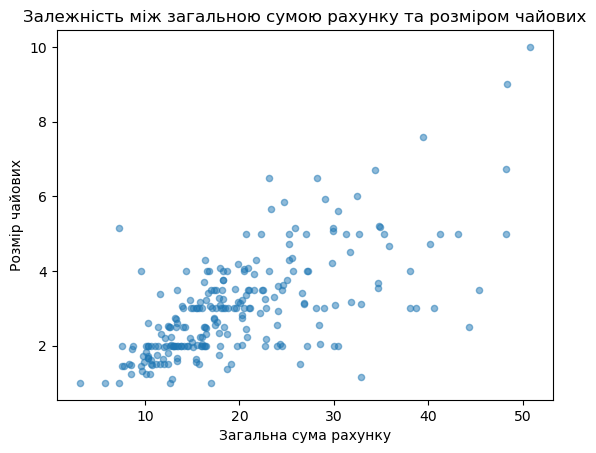

In [61]:
df.plot.scatter(x='total_bill', y='tip', alpha=0.5)
plt.title('Залежність між загальною сумою рахунку та розміром чайових')
plt.xlabel('Загальна сума рахунку')
plt.ylabel('Розмір чайових');

---

**4. Bar chart: середній рахунок за часом**

Створіть стовпчасту діаграму середнього рахунку за часом дня (`time`).

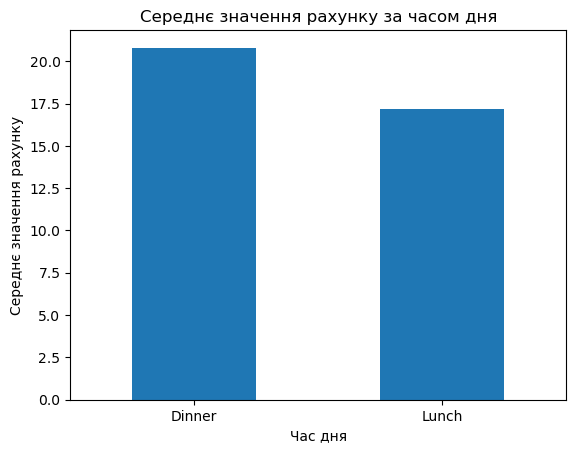

In [62]:
df.groupby('time')['total_bill'].mean().plot(kind='bar')
plt.title('Середнє значення рахунку за часом дня')
plt.ylabel('Середнє значення рахунку')
plt.xlabel('Час дня')
plt.xticks(rotation=0);

---

**5. Інтерактивна діаграма розсіювання**

Створіть з допомогою бібліотек Plotly інтерактивний scatter plot для `total_bill` vs `tip` з кольором за статтю (`sex`).


In [63]:
fig = px.scatter(df, x='total_bill', y='tip', color='sex',
                 title='Загальний рахунок vs Розмір чайових',
                 labels={'total_bill': 'Загальна сума рахунку', 'tip': 'Розмір чайових', 'sex': 'Стать'})
fig.show()

---

**6. Інтерактивний box plot: чайові за днями та статтю**

Створіть інтерактивний box plot для чайових за днями тижня з розбивкою за кольором по статі.

In [64]:
fig = px.box(df, x='day', y='tip', color='sex',
             title='Розподіл чайових за днями тижня та статтю',
             labels={'day': 'День тижня', 'tip': 'Розмір чайових', 'sex': 'Стать'})
fig.show()